In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
import tensorflow as tf
from tensorflow import keras

/Users/James/.pyenv/versions/3.8.5/envs/ml_env/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
housing = fetch_california_housing()


In [5]:
#Get training and testing split from full dataset

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, test_size=0.33, random_state=42)

In [6]:
#split training set into training mini set and vlaidation set

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=42)

In [7]:
#Scaling inputs

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [26]:
model_seq = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model_seq.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model_seq.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model_seq.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model_seq.predict(X_new)

Epoch 1/20
290/290 [==============================] - 1s 2ms/step - loss: 3.4123 - val_loss: 0.9732
Epoch 2/20
290/290 [==============================] - 0s 2ms/step - loss: 0.8746 - val_loss: 0.7402
Epoch 3/20
290/290 [==============================] - 1s 2ms/step - loss: 0.7406 - val_loss: 0.6924
Epoch 4/20
290/290 [==============================] - 0s 2ms/step - loss: 0.7087 - val_loss: 0.6663
Epoch 5/20
290/290 [==============================] - 0s 2ms/step - loss: 0.6886 - val_loss: 0.6427
Epoch 6/20
290/290 [==============================] - 0s 2ms/step - loss: 0.6297 - val_loss: 0.6232
Epoch 7/20
290/290 [==============================] - 1s 2ms/step - loss: 0.6239 - val_loss: 0.6059
Epoch 8/20
290/290 [==============================] - 1s 2ms/step - loss: 0.5942 - val_loss: 0.5906
Epoch 9/20
290/290 [==============================] - 1s 2ms/step - loss: 0.5735 - val_loss: 0.5779
Epoch 10/20
290/290 [==============================] - 1s 2ms/step - loss: 0.5894 - val_loss: 0.5650

(0.0, 1.0)

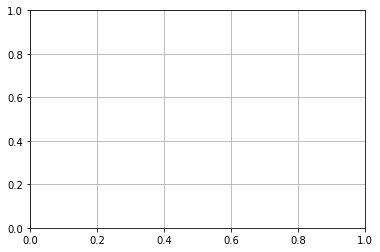

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
model_seq_hist = pd.DataFrame(history.history)
plt.grid(True)
plt.gca().set_ylim(0,1)

In [28]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model_func = keras.models.Model(inputs=[input_], outputs=[output])

In [29]:
model_func.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model_func.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model_func.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model_func.predict(X_new)

Epoch 1/20
290/290 [==============================] - 1s 2ms/step - loss: 3.7882 - val_loss: 0.9112
Epoch 2/20
290/290 [==============================] - 0s 2ms/step - loss: 0.8364 - val_loss: 0.6916
Epoch 3/20
290/290 [==============================] - 0s 2ms/step - loss: 0.7045 - val_loss: 0.6427
Epoch 4/20
290/290 [==============================] - 0s 2ms/step - loss: 0.6455 - val_loss: 0.6061
Epoch 5/20
290/290 [==============================] - 0s 2ms/step - loss: 0.6125 - val_loss: 0.5868
Epoch 6/20
290/290 [==============================] - 0s 2ms/step - loss: 0.5765 - val_loss: 0.5687
Epoch 7/20
290/290 [==============================] - 0s 2ms/step - loss: 0.5787 - val_loss: 0.5557
Epoch 8/20
290/290 [==============================] - 1s 2ms/step - loss: 0.5742 - val_loss: 0.5448
Epoch 9/20
290/290 [==============================] - 0s 2ms/step - loss: 0.5641 - val_loss: 0.5341
Epoch 10/20
290/290 [==============================] - 1s 2ms/step - loss: 0.5322 - val_loss: 0.5263

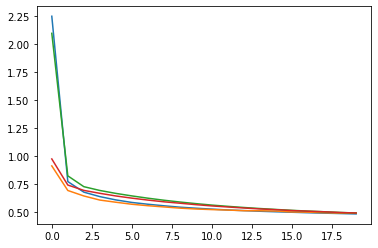

In [34]:
model_func_history = pd.DataFrame(history.history)
plt.plot(model_func_history)
plt.plot(model_seq_hist)


Imperitive style

In [38]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
            super().__init__(**kwargs)
            self.hidden1 = keras.layers.Dense(units, activation=activation)
            self.hidden2 = keras.layers.Dense(units, activation=activation)
            self.main_output = keras.layers.Dense(1)
            self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [40]:
model_func.save("my_functional_model.h5")

In [41]:
model_func = keras.models.load_model("my_functional_model.h5")

In [43]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_functional_model.h5")
history = model_func.fit(X_train, y_train, epochs = 10, callbacks = [checkpoint_cb])

Epoch 1/10
290/290 [==============================] - 1s 1ms/step - loss: 0.4794
Epoch 2/10
290/290 [==============================] - 0s 1ms/step - loss: 0.4768
Epoch 3/10
290/290 [==============================] - 0s 1ms/step - loss: 0.4739
Epoch 4/10
290/290 [==============================] - 1s 2ms/step - loss: 0.4710
Epoch 5/10
290/290 [==============================] - 0s 2ms/step - loss: 0.4689
Epoch 6/10
290/290 [==============================] - 0s 1ms/step - loss: 0.4662
Epoch 7/10
290/290 [==============================] - 0s 1ms/step - loss: 0.4640
Epoch 8/10
290/290 [==============================] - 0s 1ms/step - loss: 0.4614
Epoch 9/10
290/290 [==============================] - 0s 1ms/step - loss: 0.4589
Epoch 10/10
290/290 [==============================] - 0s 1ms/step - loss: 0.4576


In [44]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

In [46]:
history = model_func.fit(X_train, y_train, 
                    epochs = 100, 
                    validation_data = (X_valid, y_valid), 
                    callbacks = [checkpoint_cb, early_stopping_cb]
                   )

Epoch 1/100
290/290 [==============================] - 1s 2ms/step - loss: 0.4549 - val_loss: 0.4626
Epoch 2/100
290/290 [==============================] - 1s 2ms/step - loss: 0.4527 - val_loss: 0.4610
Epoch 3/100
290/290 [==============================] - 1s 2ms/step - loss: 0.4508 - val_loss: 0.4601
Epoch 4/100
290/290 [==============================] - 1s 2ms/step - loss: 0.4486 - val_loss: 0.4646
Epoch 5/100
290/290 [==============================] - 0s 2ms/step - loss: 0.4467 - val_loss: 0.4572
Epoch 6/100
290/290 [==============================] - 0s 2ms/step - loss: 0.4447 - val_loss: 0.4542
Epoch 7/100
290/290 [==============================] - 0s 2ms/step - loss: 0.4430 - val_loss: 0.4538
Epoch 8/100
290/290 [==============================] - 0s 2ms/step - loss: 0.4410 - val_loss: 0.4554
Epoch 9/100
290/290 [==============================] - 0s 2ms/step - loss: 0.4391 - val_loss: 0.4476
Epoch 10/100
290/290 [==============================] - 1s 2ms/step - loss: 0.4373 - val_lo